# Sales

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 6)

### Uploading the dataset

In [2]:
#Creating the path of the dataset
path = 'sales.xlsx'

#Uploading the dataset from xlsx file
df = pd.read_excel(path)

#Seeing the head of the dataset
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0,32370.0,16185,16185.0,2014-01-01
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0,26420.0,13210,13210.0,2014-01-01
2,Midmarket,France,Carretera,NaN,2178.0,3,15,32670.0,0,32670.0,21780,10890.0,2014-06-01
3,Midmarket,Germany,Carretera,NaN,888.0,3,15,13320.0,0,13320.0,8880,4440.0,2014-06-01
4,Midmarket,Mexico,Carretera,NaN,2470.0,3,15,37050.0,0,37050.0,24700,12350.0,2014-06-01


In [3]:
#Seeing the shape of the dataset 
df.shape

(700, 13)

In [4]:
#Seeing the info of the datset
df.info()
#We have datetime64[ns](1), float64(4), int64(4), object(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        647 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    int64         
 9   Sales                700 non-null    float64       
 10  COGS                 700 non-null    int64         
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), i

In [5]:
#Seeing the columns of the dataset
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date'],
      dtype='object')

In [6]:
#Seeing the describtion of the dataset
df.describe().T
#In some columns, the std is much bigger than the mean, we should look at them 

,count,mean,min,25%,50%,75%,max,std
Units Sold,700.0,1608.294286,200.0,905.0,1542.5,2229.125,4492.5,867.427859
Manufacturing Price,700.0,96.477143,3.0,5.0,10.0,250.0,260.0,108.602612
Sale Price,700.0,118.428571,7.0,12.0,20.0,300.0,350.0,136.775515
Gross Sales,700.0,182759.426429,1799.0,17391.75,37980.0,279025.0,1207500.0,254262.284378
Discounts,700.0,13150.341429,0.0,800.25,2585.0,15956.25,149678.0,22962.948586
Sales,700.0,169609.0718,1655.08,15928.0,35540.2,261077.5,1159200.0,236726.34691
COGS,700.0,145475.211429,918.0,7490.0,22506.0,245607.5,950625.0,203865.506124
Profit,700.0,24133.860371,-40617.5,2805.96,9242.2,22662.0,262200.0,42760.626563
Date,700,2014-04-28 21:36:00,2013-09-01 00:00:00,2013-12-24 06:00:00,2014-05-16 12:00:00,2014-09-08 12:00:00,2014-12-01 00:00:00,NaN


In [46]:
df.isnull().sum()
#As we can see, Discount Band has about 53 missing values

Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts               0
Sales                   0
COGS                    0
Profit                  0
Date                    0
dtype: int64

In [49]:
#Dropping missing values
df = df.dropna()
#Checking after dropping
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
dtype: int64

In [50]:
#Looking at duplicated values
df.duplicated().sum()
#As we can see, there is no duplicated values

0

### Segment

In [9]:
df['Segment'].unique()

array(['Government', 'Midmarket', 'Channel Partners', 'Enterprise',
       'Small Business'], dtype=object)

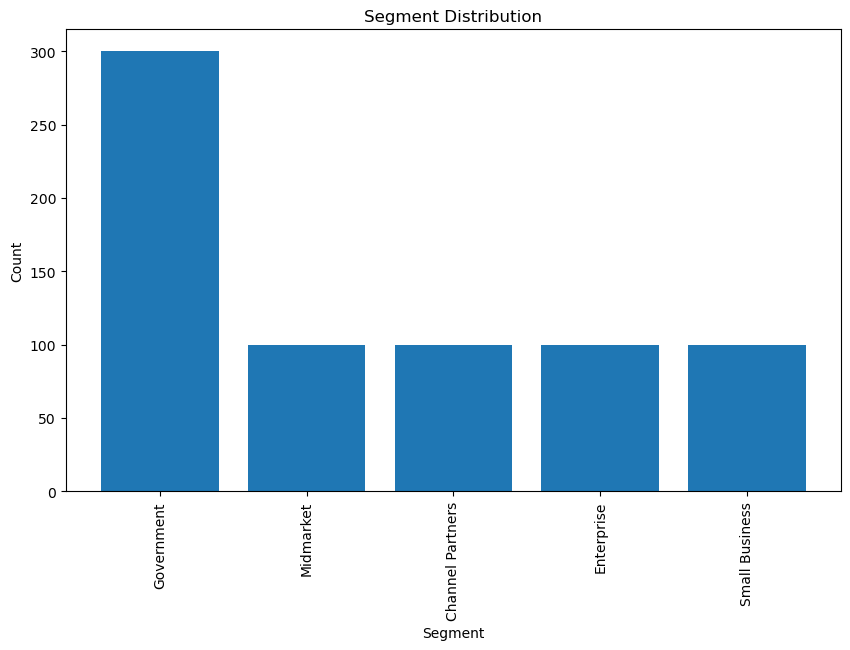

In [10]:
# Plot the column values as a bar plot
plt.bar(df['Segment'].value_counts().index, df['Segment'].value_counts().values)

# Customize the plot
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Segment Distribution')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

#From here we can notice that Government has the highest values, and the others have nearly the same ones.

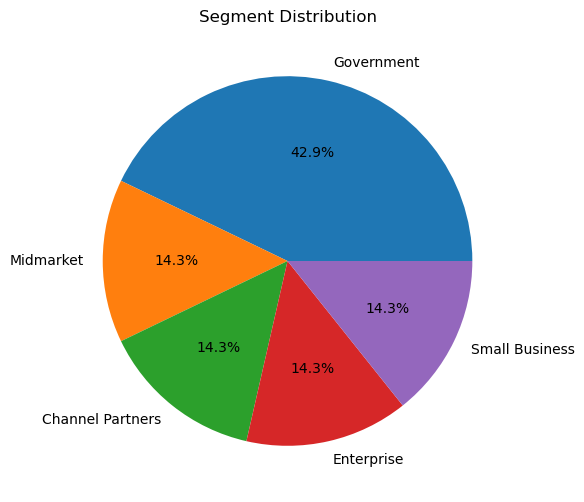

In [13]:
# Calculate the value counts of each segment
segment_counts = df['Segment'].value_counts()

# Plot the value counts as a pie chart
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Segment Distribution')

# Display the plot
plt.show()

#### Relationship between Segment and Sales

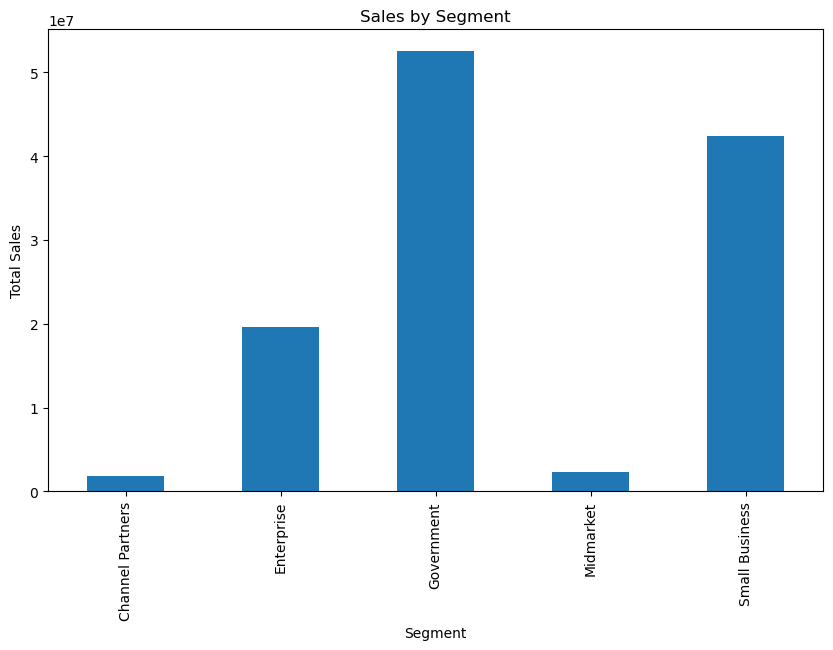

In [19]:
# Create a grouped bar plot
df.groupby('Segment')['Sales'].sum().plot(kind='bar')

# Customize the plot
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Sales by Segment')

# Display the plot
plt.show()

#From this, we can notice that 'Government' and 'Small Business' has the highest sales values

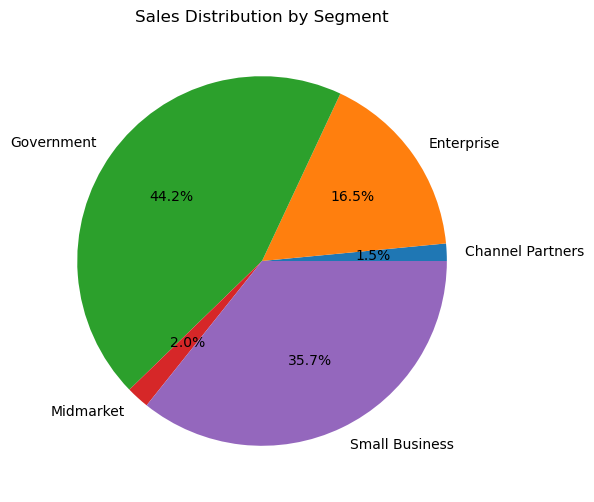

In [21]:
# Calculate the total sales for each segment
segment_sales = df.groupby('Segment')['Sales'].sum()

# Plot the total sales as a pie chart
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Sales Distribution by Segment')

# Display the plot
plt.show()

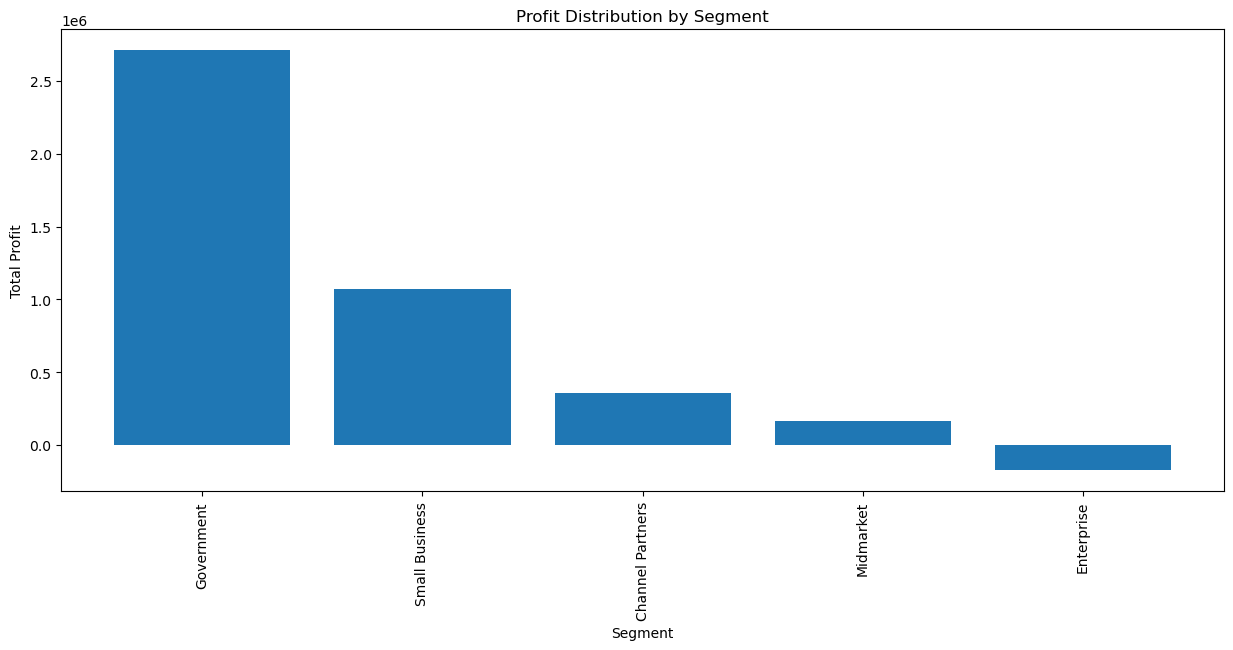

In [44]:
# Calculate the total sales for each Segment
Segment_sales = df.groupby(['Country', 'Segment'])[['Units Sold', 'Sale Price', 'Sales', 'COGS', 'Profit']].sum().round(2).reset_index().sort_values(by='Profit', ascending=False)

# Set the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
plt.bar(Segment_sales['Segment'], Segment_sales['Profit'])

# Customize the plot
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.title('Profit Distribution by Segment')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

### Looking at Country

In [15]:
df['Country'].unique()

array(['Canada', 'Germany', 'France', 'Mexico',
       'United States of America'], dtype=object)

In [16]:
#Looking at the value_counts 
df['Country'].value_counts()
#As we can see, all of them has the same value counts

Country
Canada                      140
Germany                     140
France                      140
Mexico                      140
United States of America    140
Name: count, dtype: int64

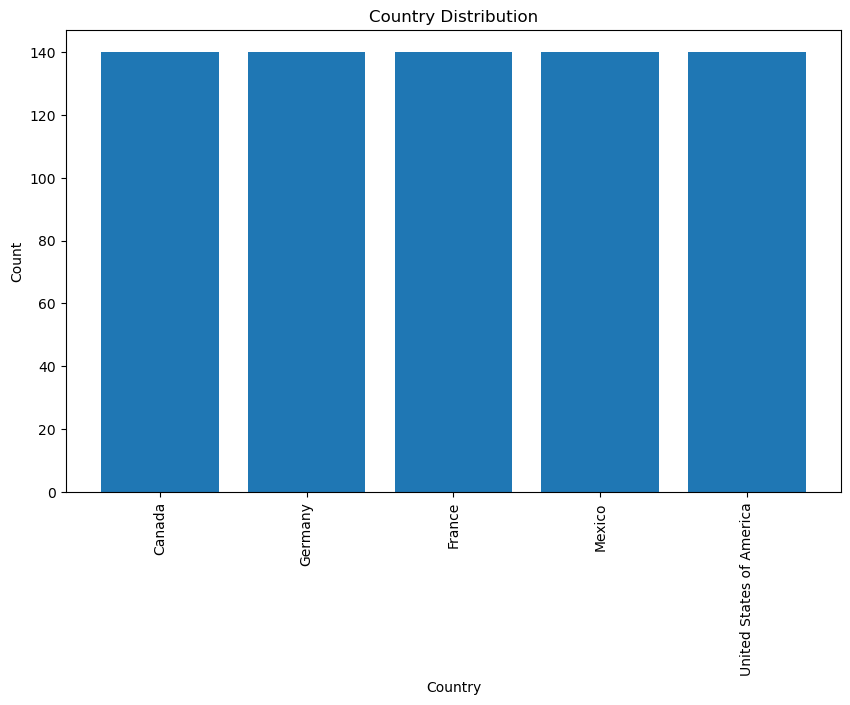

In [17]:
# Plot the column values as a bar plot
plt.bar(df['Country'].value_counts().index, df['Country'].value_counts().values)

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Distribution')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

#We can notice from the graph that, they all have the same values

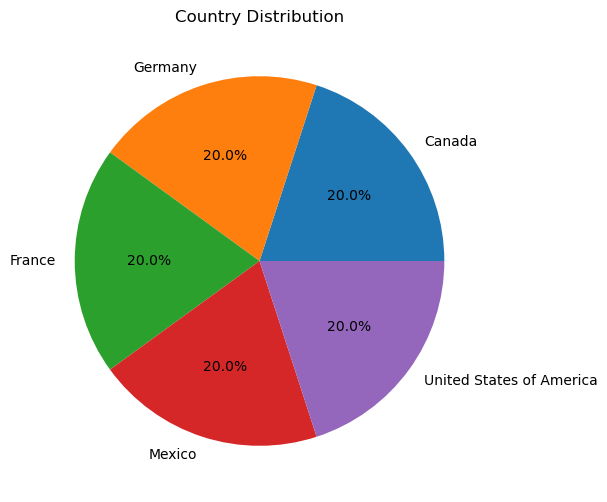

In [18]:
# Calculate the value counts of each Country
Country_counts = df['Country'].value_counts()

# Plot the value counts as a pie chart
plt.pie(Country_counts, labels=Country_counts.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Country Distribution')

# Display the plot
plt.show()

#### Relationship between Country and Sales

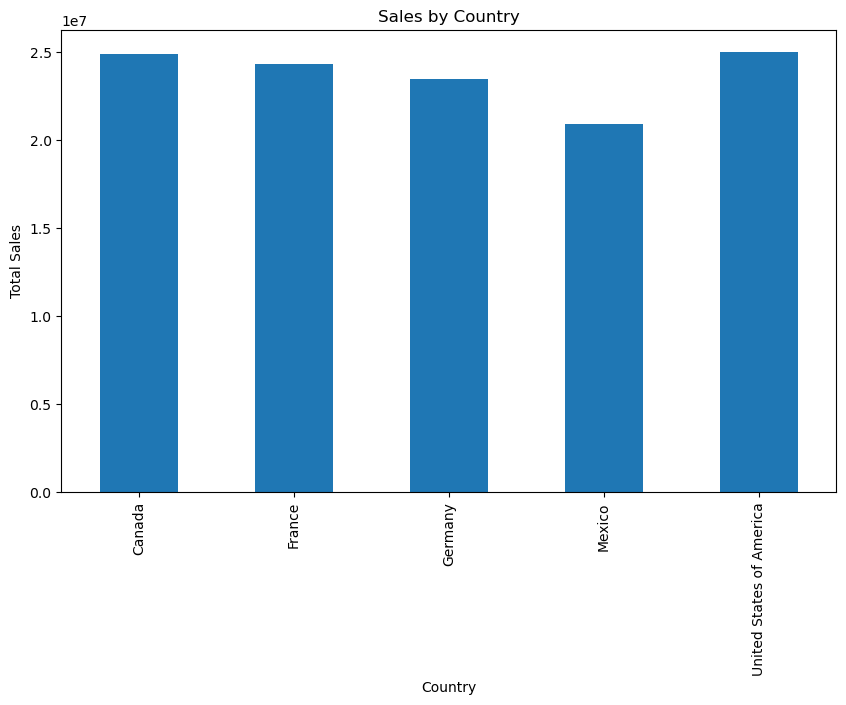

In [20]:
# Create a grouped bar plot
df.groupby('Country')['Sales'].sum().plot(kind='bar')

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Sales by Country')

# Display the plot
plt.show()

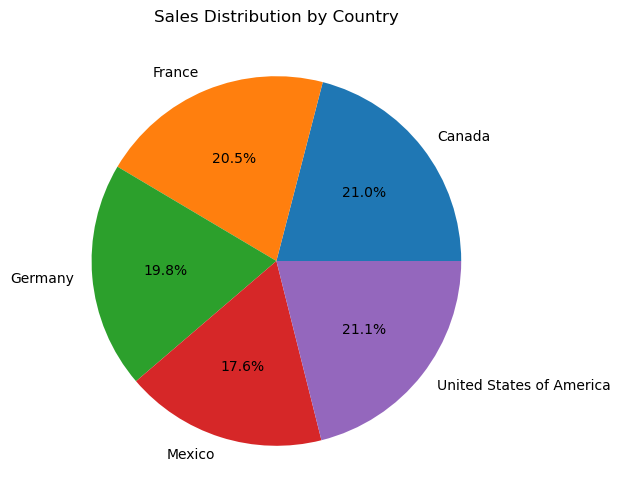

In [22]:
# Calculate the total sales for each Country
Country_sales = df.groupby('Country')['Sales'].sum()

# Plot the total sales as a pie chart
plt.pie(Country_sales, labels=Country_sales.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Sales Distribution by Country')

# Display the plot
plt.show()

#From here, we can notice that these countries have nearly the same sales values, 
#but US and Canada have the nearly the highest values compared with the other countries

### Looking at Product

In [23]:
df['Product'].unique()

array(['Carretera', 'Montana', 'Paseo', 'Velo', 'VTT', 'Amarilla'],
      dtype=object)

In [24]:
df['Product'].value_counts()

Product
Paseo        202
Velo         109
VTT          109
Amarilla      94
Carretera     93
Montana       93
Name: count, dtype: int64

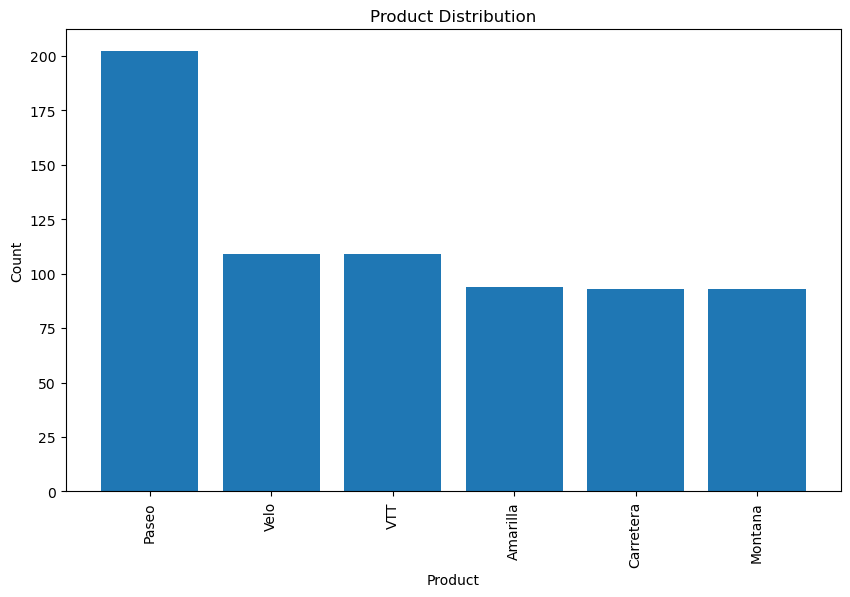

In [25]:
# Plot the column values as a bar plot
plt.bar(df['Product'].value_counts().index, df['Product'].value_counts().values)

# Customize the plot
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Product Distribution')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

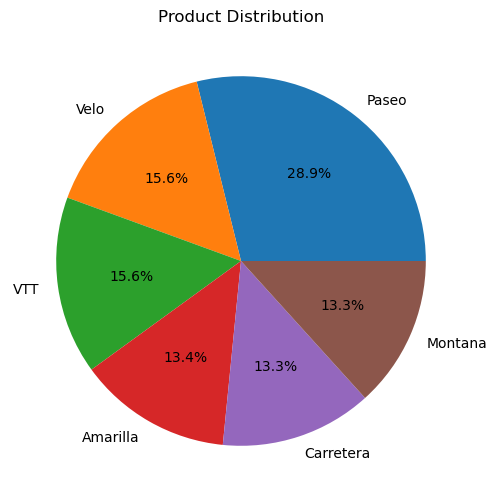

In [26]:
# Calculate the value counts of each Product
Product_counts = df['Product'].value_counts()

# Plot the value counts as a pie chart
plt.pie(Product_counts, labels=Product_counts.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Product Distribution')

# Display the plot
plt.show()

#From the chart, we can see that Paseo has the highest values

#### Relationship between Product and Sales

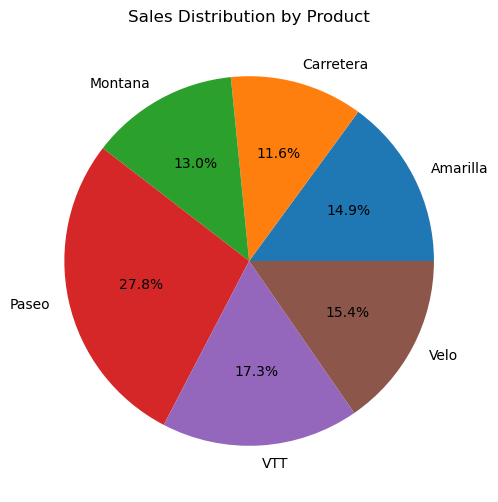

In [27]:
# Calculate the total sales for each Product
Product_sales = df.groupby('Product')['Sales'].sum()

# Plot the total sales as a pie chart
plt.pie(Product_sales, labels=Product_sales.index, autopct='%1.1f%%')

# Customize the plot
plt.title('Sales Distribution by Product')

# Display the plot
plt.show()

#Also, we can see that Paseo has the highest sales value compared with the others

In [30]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date'],
      dtype='object')

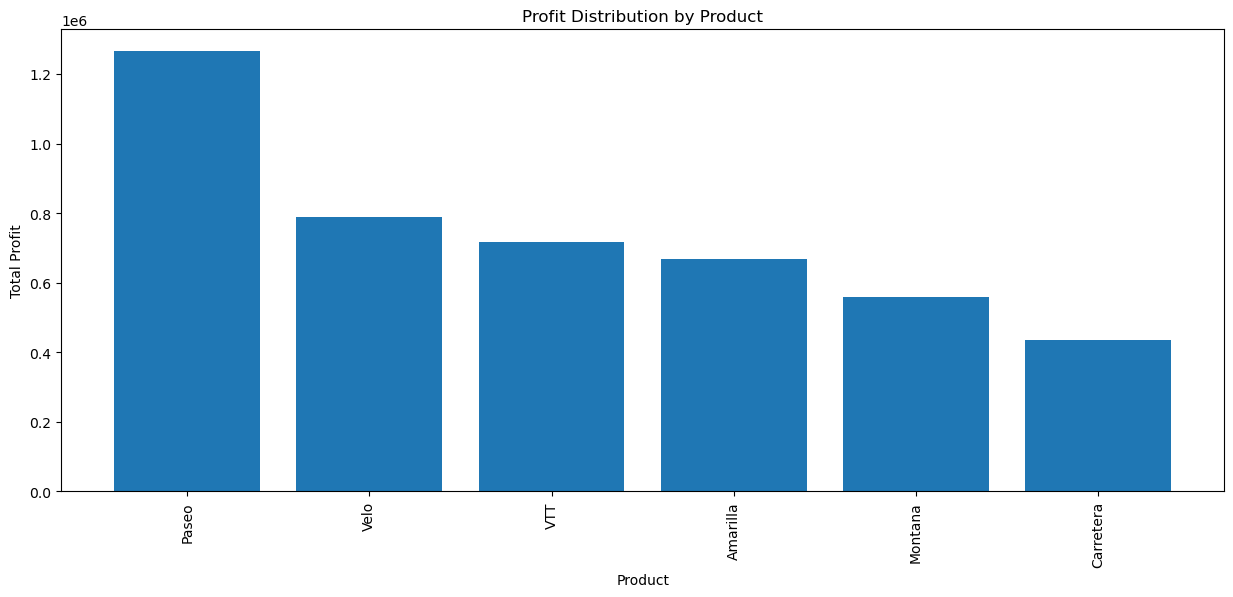

In [43]:
# Calculate the total sales for each Product
product_sales = df.groupby(['Country', 'Product'])[['Units Sold', 'Sale Price', 'Sales', 'COGS', 'Profit']].sum().round(2).reset_index().sort_values(by='Profit', ascending=False)

# Set the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
plt.bar(product_sales['Product'], product_sales['Profit'])

# Customize the plot
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.title('Profit Distribution by Product')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

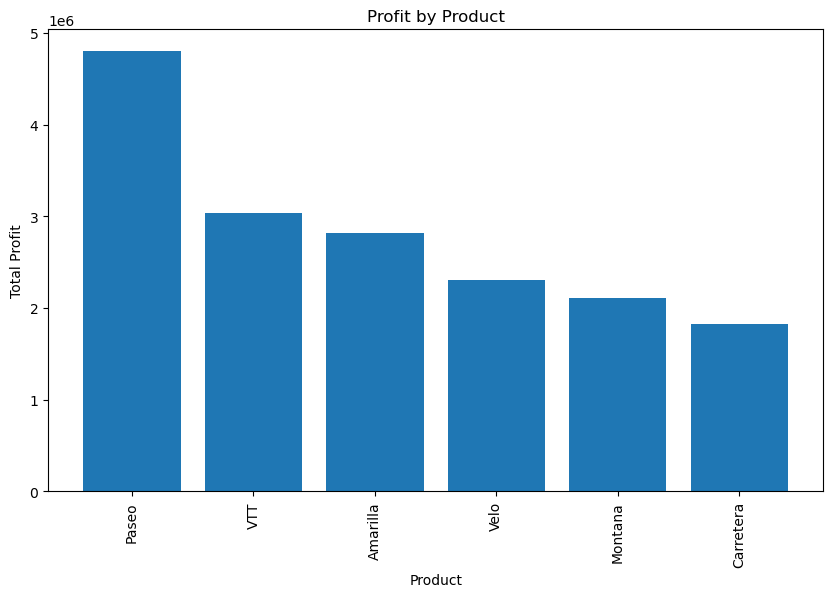

In [34]:
# Calculate the total profit for each Product
product_profit = df.groupby('Product')['Profit'].sum().round(2).reset_index().sort_values(by='Profit', ascending=False)

# Create a bar plot
plt.bar(product_profit['Product'], product_profit['Profit'])

# Customize the plot
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.title('Profit by Product')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()